<a href="https://colab.research.google.com/github/yashhooda1/Apple-vs.-Android-Comparison/blob/main/Apple_vs_Android_Comparison_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data = pd.read_csv('antutu_android_vs_ios_v3.csv')

In [4]:
#data preprocessing, check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Device         0
CPU            0
GPU            0
MEM            0
UX             0
Total Score    0
dtype: int64


In [5]:
data.head()

,Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch) (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch) (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5 (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7 (S-8 Gen 1 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 Pro (M-9000 8/128),244999,390026,169449,182367,986840


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Device       179 non-null    object
 1   CPU          179 non-null    int64 
 2   GPU          179 non-null    int64 
 3   MEM          179 non-null    int64 
 4   UX           179 non-null    int64 
 5   Total Score  179 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 8.5+ KB


In [8]:
data.describe()

,CPU,GPU,MEM,UX,Total Score
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,164315.430168,226573.279330,98529.592179,119318.597765,6.087365e+05
std,55469.900787,123333.451434,34251.401138,27252.848090,2.267753e+05
min,55203.000000,49783.000000,39208.000000,52768.000000,2.250970e+05
25%,118644.500000,132581.000000,68063.000000,98424.500000,4.195495e+05
50%,160554.000000,219809.000000,97571.000000,118275.000000,6.086710e+05
75%,196729.500000,299041.500000,120661.000000,140160.000000,7.627725e+05
max,351212.000000,741383.000000,183160.000000,182367.000000,1.429728e+06


<ipython-input-22-bc2dd32d8e22>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


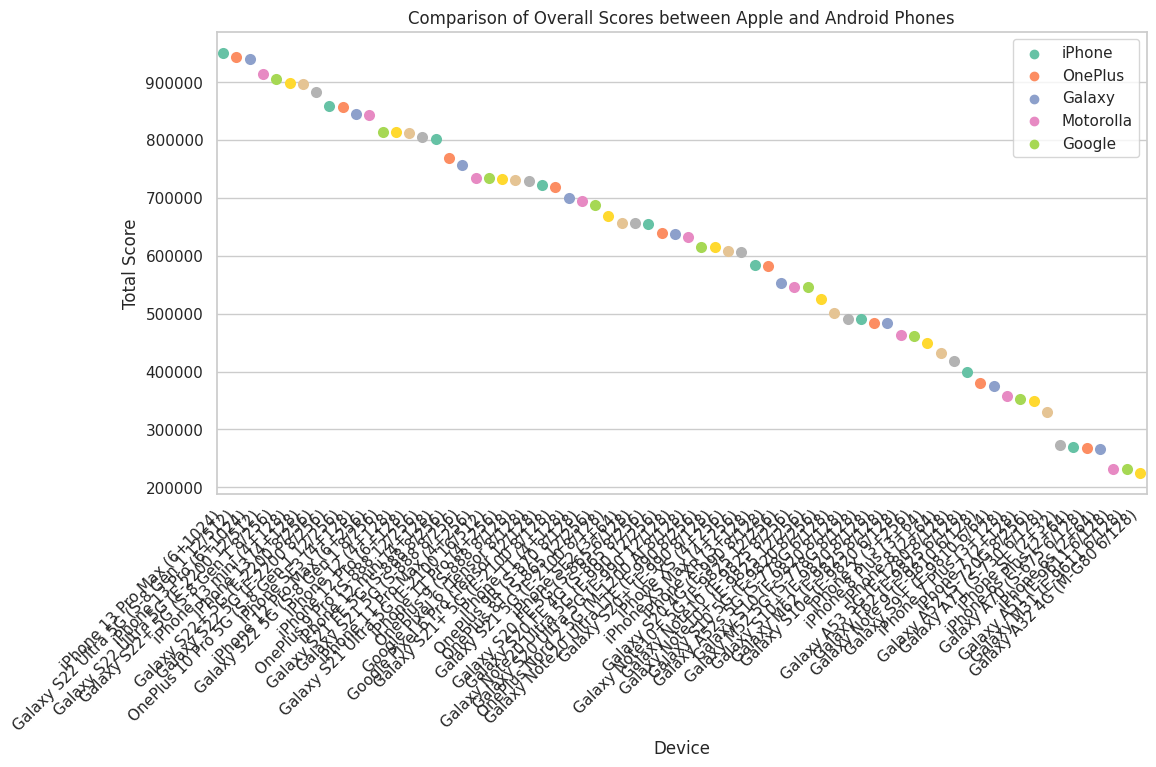

In [22]:
#Exploratory Data Analysis
# Compare the Overall Score between Apple and Android phones
# Adjust the x-axis labels in the boxplot
# Filter the dataset to include only specific device types
selected_devices = ['iPhone', 'OnePlus', 'Galaxy', 'Motorolla', 'Google']
filtered_data = data[data['Device'].str.startswith(tuple(selected_devices))]

# Adjust the x-axis labels in the boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.stripplot(x="Device", y="Total Score", data=filtered_data, jitter=0.2, size=8, hue="Device", palette="Set2")
plt.title("Comparison of Overall Scores between Apple and Android Phones")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, selected_devices)

plt.show()

#What we can infer from this graph: #The graph shows that the IPhone 13 Pro Max is the highest performing device overall in this dataset,
#there are often more light blue dots which represent IPhones which are placed higher then non light blue dots, which represent Android devices.

<ipython-input-25-3c8deb24bda3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Device'] = pd.Categorical(filtered_data['Device'])
<ipython-input-25-3c8deb24bda3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Device'] = filtered_data['Device'].cat.codes
<ipython-input-25-3c8deb24bda3>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(selected_devices, rotation=45, horizontalalignment='right')


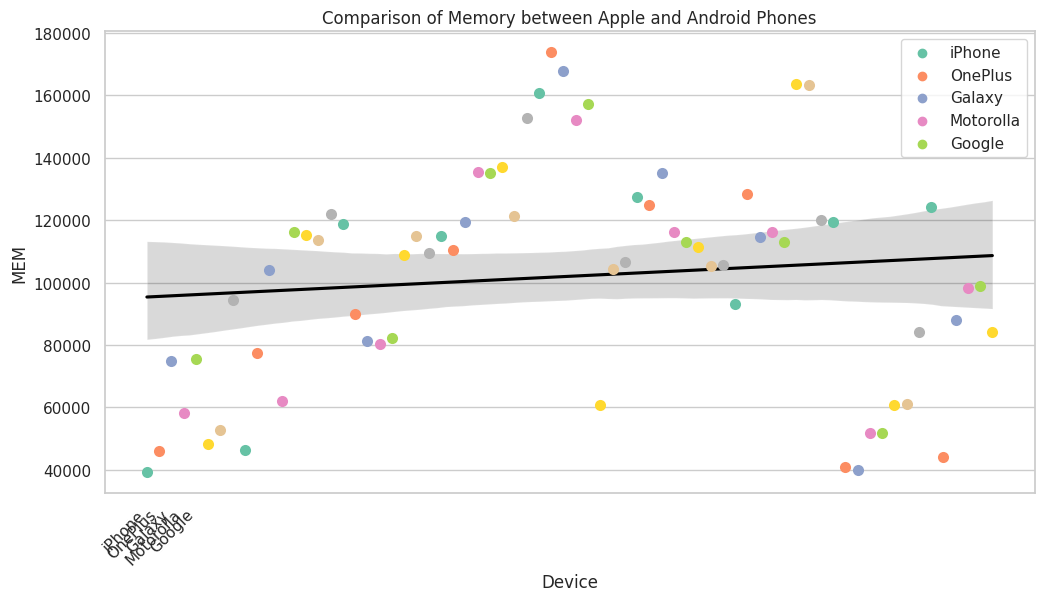

In [25]:
#Exploratory Data Analysis
# Compare the Overall Score between Apple and Android phones
# Adjust the x-axis labels in the boxplot
# Filter the dataset to include only specific device types
# Adjust the x-axis labels in the boxplot
# Convert the 'Device' column to categorical numerical values
filtered_data['Device'] = pd.Categorical(filtered_data['Device'])
filtered_data['Device'] = filtered_data['Device'].cat.codes

# Adjust the x-axis labels in the boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.stripplot(x="Device", y="MEM", data=filtered_data, jitter=0.2, size=8, hue="Device", palette="Set2")
plt.title("Comparison of Memory between Apple and Android Phones")
ax.set_xticklabels(selected_devices, rotation=45, horizontalalignment='right')

# Adding a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, selected_devices)

# Adding a line of best fit
sns.regplot(x="Device", y="MEM", data=filtered_data, scatter=False, color='black')

plt.show()

In [26]:
#What we can conclude from the previous graph is that since there are more light blue dots that represent IPhones then,
#any other device, IPhones have more memory then Android devices.

In [ ]:
#To do list, compare devices with GPU, CPU, and UX, then perform the hypothesis testing with overall score.
# Step 4: Hypothesis Testing
# Perform t-test to compare the means of benchmark scores for Apple and Android devices
#apple_scores = data[data['Device_Type'] == 'Apple']['Benchmark_Score']
#android_scores = data[data['Device_Type'] == 'Android']['Benchmark_Score']

#t_stat, p_value = stats.ttest_ind(apple_scores, android_scores, equal_var=False)
#print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Step 5: Conclusion
#if p_value < 0.05:
    #print("There is a significant difference between the performance of Apple and Android devices.")
#else:
    #print("There is no significant difference between the performance of Apple and Android devices.")